<a href="https://colab.research.google.com/github/rohandawar/pandaspractise/blob/main/Pandas_cipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_table(url)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
#see first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
#number of observation
chipo.shape

(4622, 5)

In [5]:
#number of observations
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [6]:
#number of columns
len(chipo.columns)

5

In [7]:
#print the names of columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
#How is the dataset indexed?-- check this
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [9]:
#Which was the most-ordered item?
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

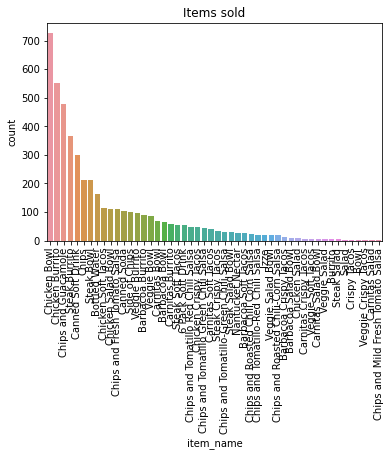

In [10]:
# Another approach for getting the maximum sold iteam.
sns.countplot(x = 'item_name', data = chipo, order=chipo['item_name'].value_counts().index)
plt.title('Items sold')
plt.xticks(rotation=90)
plt.show()

In [11]:
#another method for the same.
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [12]:
#For the most-ordered item, how many items were ordered?
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [13]:
#What was the most ordered item in the choice_description column
chipo['choice_description'].value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

In [14]:
#another method
cd = chipo.groupby('choice_description')
cd = cd.sum()
cd = cd.sort_values(['quantity'], ascending=False)
cd.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [15]:
#How many items were orderd in total?
total_quantities = chipo['quantity'].sum()
print('Total Quantities Ordered: ', total_quantities)

Total Quantities Ordered:  4972


In [16]:
#Turn the item price into a float
#Check the item price type
chipo.item_price.dtype

dtype('O')

In [17]:
#Create a lambda function and change the type of item price
dollarizer = lambda x:float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(dollarizer)

In [18]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [19]:
#Check the item price type
chipo.item_price.dtype

dtype('float64')

In [20]:
#How much was the revenue for the period in the dataset
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [23]:
#How many orders were made in the period
orders = chipo['quantity'].sum()
print('Total Orders: ', orders)

Total Orders:  4972


In [24]:
# How many orders were made in the period?-- given in the notebook.

# orders = chipo.order_id.value_counts().count()
# orders

In [27]:
#What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [29]:
# How many different items are sold
chipo.item_name.value_counts().count()

50